<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-&amp;-Clean-Bayswater-Bridge-Data" data-toc-modified-id="Importing-&amp;-Clean-Bayswater-Bridge-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing &amp; Clean Bayswater Bridge Data</a></span><ul class="toc-item"><li><span><a href="#Parsing-Web-Data" data-toc-modified-id="Parsing-Web-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Parsing Web Data</a></span></li><li><span><a href="#Data-Transformation" data-toc-modified-id="Data-Transformation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Transformation</a></span></li></ul></li><li><span><a href="#Import-&amp;-Clean-Montague-Bridge-Data" data-toc-modified-id="Import-&amp;-Clean-Montague-Bridge-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import &amp; Clean Montague Bridge Data</a></span><ul class="toc-item"><li><span><a href="#Data-Transformation" data-toc-modified-id="Data-Transformation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Transformation</a></span></li></ul></li><li><span><a href="#Combine-Dates-Hit" data-toc-modified-id="Combine-Dates-Hit-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Combine Dates Hit</a></span></li><li><span><a href="#Summary-Stats-&amp;-Visualisation" data-toc-modified-id="Summary-Stats-&amp;-Visualisation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary Stats &amp; Visualisation</a></span><ul class="toc-item"><li><span><a href="#Compare-by-month" data-toc-modified-id="Compare-by-month-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Compare by month</a></span></li><li><span><a href="#Compare-by-weekday" data-toc-modified-id="Compare-by-weekday-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Compare by weekday</a></span></li><li><span><a href="#Day-&amp;-Month-Heatmaps" data-toc-modified-id="Day-&amp;-Month-Heatmaps-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Day &amp; Month Heatmaps</a></span></li></ul></li><li><span><a href="#Does-it-match-a-Poisson-Process?" data-toc-modified-id="Does-it-match-a-Poisson-Process?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Does it match a Poisson Process?</a></span><ul class="toc-item"><li><span><a href="#Simulate-time-between-crashes" data-toc-modified-id="Simulate-time-between-crashes-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Simulate time between crashes</a></span><ul class="toc-item"><li><span><a href="#Plot-of-time-between-crashes:-Baywater-vs-Exponential" data-toc-modified-id="Plot-of-time-between-crashes:-Baywater-vs-Exponential-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Plot of time between crashes: Baywater vs Exponential</a></span></li><li><span><a href="#Plot-of-time-between-crashes:-Montague-vs-Exponential" data-toc-modified-id="Plot-of-time-between-crashes:-Montague-vs-Exponential-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Plot of time between crashes: Montague vs Exponential</a></span></li></ul></li><li><span><a href="#Simulate-number-of-crashes-per-year" data-toc-modified-id="Simulate-number-of-crashes-per-year-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Simulate number of crashes per year</a></span><ul class="toc-item"><li><span><a href="#Plot-the-Poisson-PDF-and-calculate-proportion-of-years-with-at-least-10-accidents" data-toc-modified-id="Plot-the-Poisson-PDF-and-calculate-proportion-of-years-with-at-least-10-accidents-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Plot the Poisson PDF and calculate proportion of years with at least 10 accidents</a></span></li></ul></li></ul></li><li><span><a href="#Timeline-Visualisations" data-toc-modified-id="Timeline-Visualisations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Timeline Visualisations</a></span><ul class="toc-item"><li><span><a href="#Create-a-daily-timeseries" data-toc-modified-id="Create-a-daily-timeseries-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Create a daily timeseries</a></span></li><li><span><a href="#Prism-Plot" data-toc-modified-id="Prism-Plot-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Prism Plot</a></span></li><li><span><a href="#Dot-Plot" data-toc-modified-id="Dot-Plot-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Dot Plot</a></span></li></ul></li><li><span><a href="#We-are-living-in-a-simulation" data-toc-modified-id="We-are-living-in-a-simulation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>We are living in a simulation</a></span><ul class="toc-item"><li><span><a href="#Alternate-universe-10-years-with-200-bridges" data-toc-modified-id="Alternate-universe-10-years-with-200-bridges-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Alternate universe 10 years with 200 bridges</a></span></li><li><span><a href="#200-Bridge-Statistics" data-toc-modified-id="200-Bridge-Statistics-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>200 Bridge Statistics</a></span></li></ul></li></ul></div>

In [1]:
import requests
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random #used later for simulating poisson process
import datetime

# Importing & Clean Bayswater Bridge Data

In [3]:
#simple function to parse webpage html
def url_to_soup(url):
    _df = requests.get(url).content
    soup_df = BeautifulSoup(_df, 'html.parser')
    return soup_df

In [4]:
bayswater_url = r'https://howmanydayssincebayswaterbridgehasbeenhit.com/'
bayswater_soup = url_to_soup(bayswater_url)

## Parsing Web Data

In [5]:
bayswater_crash_list = [x.get_text() for x in bayswater_soup.findAll('h4')] #gets the dates
bayswater_crash_labels = [x.get_text() for x in bayswater_soup.findAll('p')] #gets the labels
#remove header and footers
bayswater_crash_labels = bayswater_crash_labels[2:-6]

## Data Transformation

In [6]:
bayswater = pd.DataFrame(bayswater_crash_list, columns=['Bayswater_Bridge_Dates'])
bayswater['Bayswater_Bridge_Dates'] = pd.to_datetime(bayswater['Bayswater_Bridge_Dates']) #fix date format
bayswater['Tally'] = 1

In [7]:
#seems like there was a lapse in recording accidents before 2013
bayswater = bayswater[bayswater['Bayswater_Bridge_Dates'].dt.year >= 2013]

In [8]:
#add some useful metrics 
bayswater['Days_Between_Hits'] = bayswater['Bayswater_Bridge_Dates'].diff().mul(-1)/ np.timedelta64(1, 'D')
bayswater['Month'] = bayswater['Bayswater_Bridge_Dates'].dt.month
bayswater['Weekday'] = bayswater['Bayswater_Bridge_Dates'].dt.day_name()
bayswater['WeekdayNum'] = bayswater['Bayswater_Bridge_Dates'].dt.dayofweek

In [9]:
#print out first date of crash recorded
print(f"Bayswater first crash date recorded was {bayswater['Bayswater_Bridge_Dates'].min().strftime('%d %b %Y')}")

#print out most recent crash recorded
print(f"Bayswater St most recent date recorded was {bayswater['Bayswater_Bridge_Dates'].max().strftime('%d %b %Y')}")

Bayswater first crash date recorded was 02 Nov 2013
Bayswater St most recent date recorded was 09 Nov 2020


# Import & Clean Montague Bridge Data

Montague Bridge has a nice API we can use to extract the data

In [10]:
montague_url = r'https://howmanydayssincemontaguestreetbridgehasbeenhit.com/api?after=all'

In [11]:
montague_api_response = requests.get(montague_url)
montague_api_text = montague_api_response.text

In [12]:
#simple regex to extract all the dates which is in format yyyy-mm-dd
month_crash_list = re.findall(r'\d{4}-\d{2}-\d{2}', montague_api_text)

## Data Transformation

In [13]:
monty = pd.DataFrame(month_crash_list, columns=['Monty_Bridge_Dates'])
monty['Monty_Bridge_Dates'] = pd.to_datetime(monty['Monty_Bridge_Dates']) #fix date format
monty['Tally'] = 1

In [14]:
#add some useful metrics 
monty['Days_Between_Hits'] = monty['Monty_Bridge_Dates'].diff().mul(-1)/ np.timedelta64(1, 'D')
monty['Month'] = monty['Monty_Bridge_Dates'].dt.month
monty['Weekday'] = monty['Monty_Bridge_Dates'].dt.day_name()
monty['WeekdayNum'] = monty['Monty_Bridge_Dates'].dt.dayofweek

In [15]:
#print out first date of crash recorded
print(f"Montague St first crash date recorded was {monty['Monty_Bridge_Dates'].min().strftime('%d %b %Y')}")
#print out most recent crash recorded
print(f"Montague St most recent date recorded was {monty['Monty_Bridge_Dates'].max().strftime('%d %b %Y')}")

Montague St first crash date recorded was 22 Feb 2016
Montague St most recent date recorded was 07 Nov 2020


# Combine Dates Hit

In [16]:
monty_hit_df = monty[['Days_Between_Hits']].dropna()
monty_hit_df['Bridge'] = 'Monty' #add a label of bridge name

bayswater_hit_df = bayswater[['Days_Between_Hits']].dropna()
bayswater_hit_df['Bridge'] = 'Bayswater' #add a label of bridge name

bridges_hit_df = pd.concat([monty_hit_df, bayswater_hit_df]) #concat side by side

# Summary Stats & Visualisation

In [17]:
#least days between hits!
bridges_hit_df.groupby('Bridge')[['Days_Between_Hits']].agg(['min','max','mean','std','count']).round(0)

Days_Between_Hits                         
                        min    max  mean   std count
Bridge                                              
Bayswater               0.0  303.0  52.0  61.0    49
Monty                   0.0  248.0  54.0  61.0    32

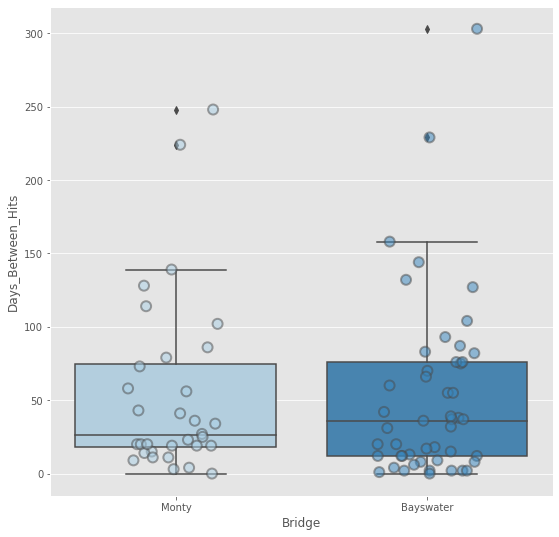

In [18]:
#generate boxplot and strip plot
plt.figure(figsize=(9,9))

sns.boxplot(x='Bridge',y='Days_Between_Hits', 
            data = bridges_hit_df, 
            palette = 'Blues'
           )

sns.stripplot(x='Bridge',y='Days_Between_Hits',  
               data = bridges_hit_df,
              palette = 'Blues', alpha=0.5,
              linewidth=2, size=10, jitter=0.2)
plt.show();

## Compare by month

In [19]:
monthly_normalized = bayswater['Month'].value_counts(normalize=True).sort_index().to_frame('Bayswater')
monthly_normalized['Montague'] = monty['Month'].value_counts(normalize=True).sort_index()
monthly_normalized['Month'] = np.arange(1,13)
monthly_normalized = monthly_normalized.melt(id_vars='Month', var_name='Bridge', value_name='Proportion') #wide to long

#now compare this to a distribution where each month was equally proportioned with bridge strikes
monthly_normalized['Relative_Proportion'] = monthly_normalized['Proportion'].fillna(0).sub(1/12)

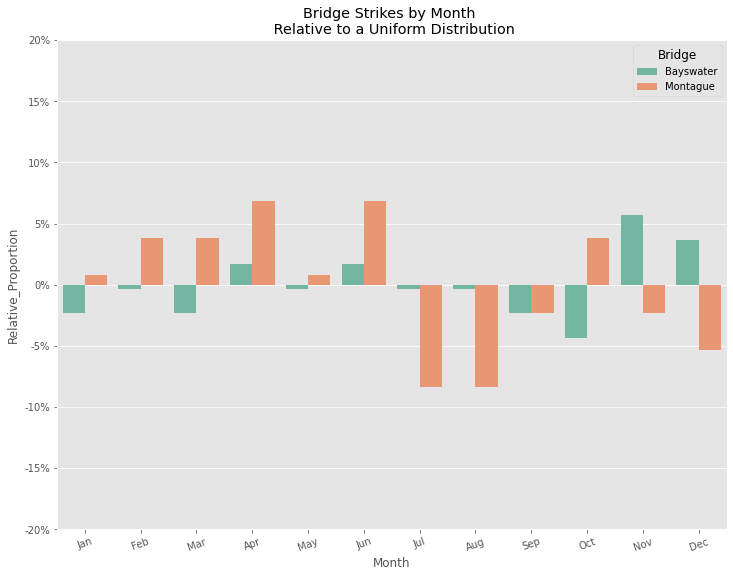

In [20]:
from matplotlib.ticker import StrMethodFormatter

month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x="Month", hue="Bridge", y="Relative_Proportion", data=monthly_normalized, palette='Set2', ax=ax)
ax.set_title('Bridge Strikes by Month \n Relative to a Uniform Distribution')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))   #percentage
plt.xticks(np.arange(12), month_names, rotation=20)
plt.ylim(-0.20,0.20)
plt.show();

## Compare by weekday

In [21]:
weekday_normalized = bayswater['Weekday'].value_counts(normalize=True).to_frame('Bayswater')
weekday_normalized['Montague'] = monty['Weekday'].value_counts(normalize=True)

In [22]:
weekday_normalized['Weekday'] = weekday_normalized.index
weekday_normalized = weekday_normalized.reset_index(drop=True).melt(id_vars='Weekday', var_name='Bridge', value_name='Proportion') #wide to long

In [23]:
#now compare this to a distribution where each weekday was equally proportioned with bridge strikes
weekday_normalized['Relative_Proportion'] = weekday_normalized['Proportion'].fillna(0).sub(1/7)

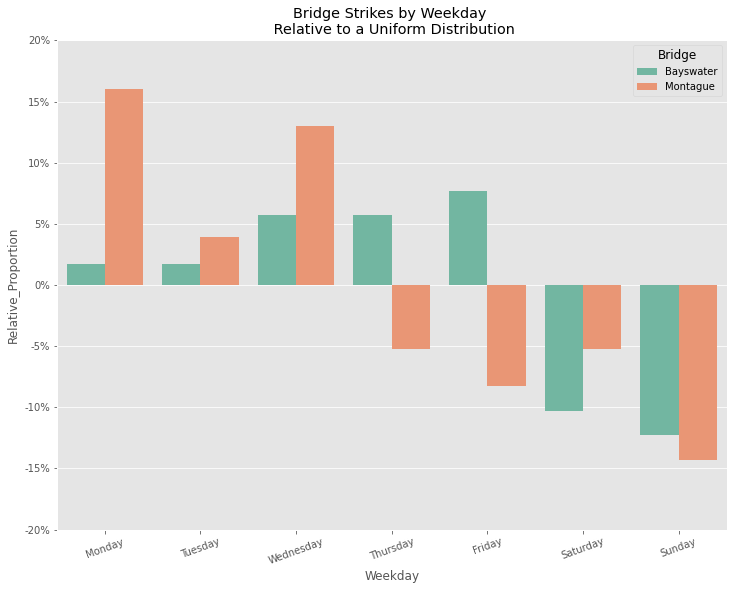

In [24]:
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x="Weekday", hue="Bridge", y="Relative_Proportion", data=weekday_normalized, palette='Set2',
           order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ax=ax)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))   #percentage
ax.set_title('Bridge Strikes by Weekday \n Relative to a Uniform Distribution')
plt.xticks(rotation=20)
plt.ylim(-0.20,0.20)
plt.show();

## Day & Month Heatmaps

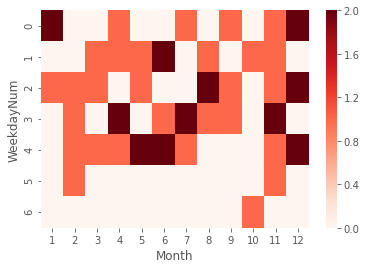

In [25]:
#note Monday =0, Tues=1,...,Sunday=6
bayswater_heatmap = bayswater.groupby(['Month','WeekdayNum']).size().unstack().fillna(0)
sns.heatmap(bayswater_heatmap.T, cmap='Reds');

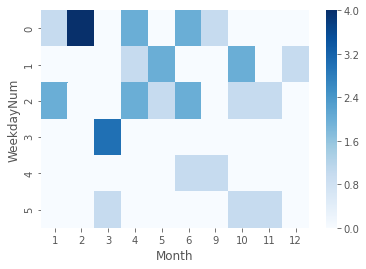

In [26]:
#note Monday =0, Tues=1,...,Sunday=6
monty_heatmap = monty.groupby(['Month','WeekdayNum']).size().unstack().fillna(0)
sns.heatmap(monty_heatmap.T, cmap='Blues');

# Does it match a Poisson Process?

## Simulate time between crashes 
- Since we want typical `time between events` we will be using an `Exponential` PDF

Assume $\lambda$ = 1/50 which is close to the 52 day per strike average for the two bridges

In [27]:
#let's generate 10000 random points
random.seed(42) #seed to make it repeatable
num_simulated = 10000
days_between_crashes = 50 #note lambda = 1/days per crash
exponential_pdf = [round(random.expovariate(1/days_between_crashes)) for x in range(num_simulated)]

#print out a little summary
f"The shortest gap between bridge strikes was: {min(exponential_pdf)} days \
whilst the longest gap was {max(exponential_pdf)} days)"

'The shortest gap between bridge strikes was: 0 days whilst the longest gap was 465 days)'

In [28]:
#create dataframe and load in simulated values
exp_pdf_df = pd.DataFrame(data=exponential_pdf, columns=['simulated_vals'])

bin_width_days = 25 #number of days in each bin
bins=np.arange(0,525,bin_width_days) #bins up to 500 days
#pandas cut to get bins
exp_pdf_df['labels'] = (pd.cut(exp_pdf_df['simulated_vals'], bins = bins, labels= bins[:-1] + bin_width_days/2).
                        astype('float')) #convert from categorical to float

In [29]:
#count of bins
exponential_hist = exp_pdf_df['labels'].value_counts(normalize=True).reset_index() 
exponential_hist.columns = ['day_mid_pt','proportion']

### Plot of time between crashes: Baywater vs Exponential

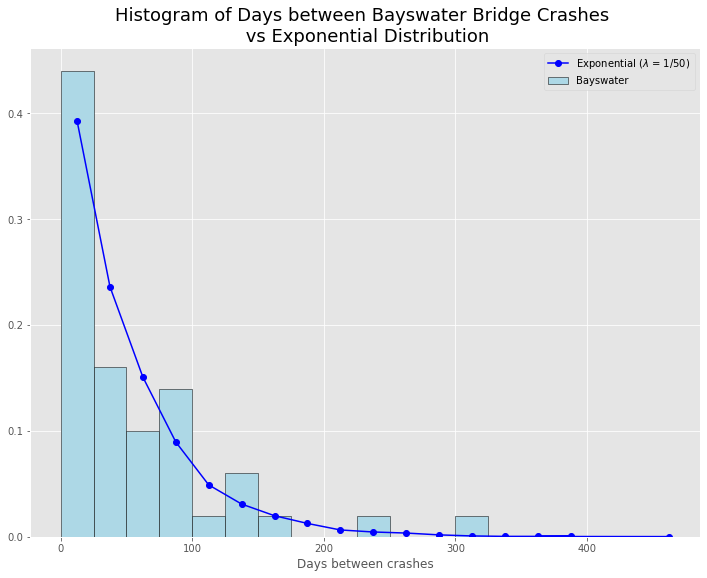

In [30]:
plt.figure(figsize=(12,9))
plt.hist(bayswater['Days_Between_Hits'], color = 'lightblue', edgecolor='k', bins=np.arange(0,350,bin_width_days), 
         label='Bayswater',
        weights=np.ones(len(bayswater))/len(bayswater))
plt.plot(exponential_hist['day_mid_pt'], exponential_hist['proportion'], '-bo', label='Exponential ($\lambda$ = 1/50)')
plt.legend()
plt.title('Histogram of Days between Bayswater Bridge Crashes \n vs Exponential Distribution', fontsize=18)
plt.xlabel('Days between crashes')
plt.show();

### Plot of time between crashes: Montague vs Exponential

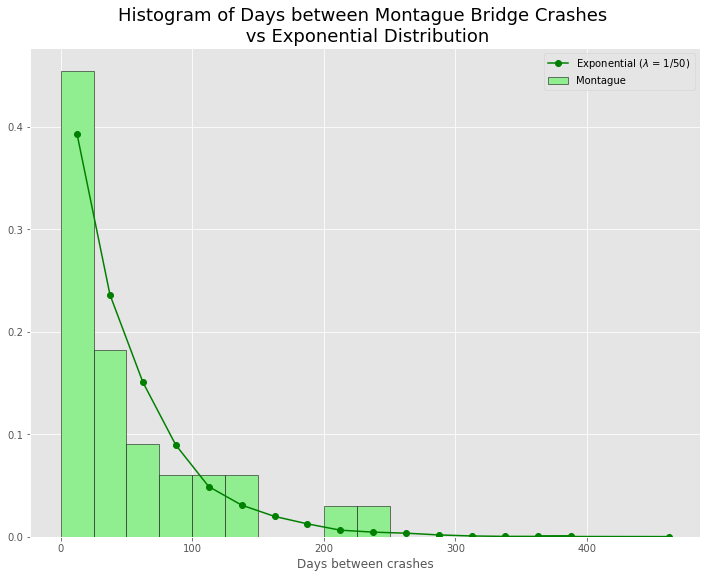

In [31]:
plt.figure(figsize=(12,9))
plt.hist(monty['Days_Between_Hits'], color = 'lightgreen', edgecolor='k', bins=np.arange(0,350,bin_width_days), 
         label='Montague',
        weights=np.ones(len(monty))/len(monty))
plt.plot(exponential_hist['day_mid_pt'], exponential_hist['proportion'], '-go', label='Exponential ($\lambda$ = 1/50)')
plt.legend()
plt.title('Histogram of Days between Montague Bridge Crashes \n vs Exponential Distribution', fontsize=18)
plt.xlabel('Days between crashes')
plt.show();

## Simulate number of crashes per year
- Since we are now talking about `number of events` over a period of time we will be using a `Poisson` PDF

In [32]:
#generate a poisson distribution using 1 million random points
random.seed(42) #seed to make it repeatable
poisson_dist = np.random.poisson(365/days_between_crashes,1000000)
prop_10_plus = np.mean(poisson_dist >= 10)

### Plot the Poisson PDF and calculate proportion of years with at least 10 accidents

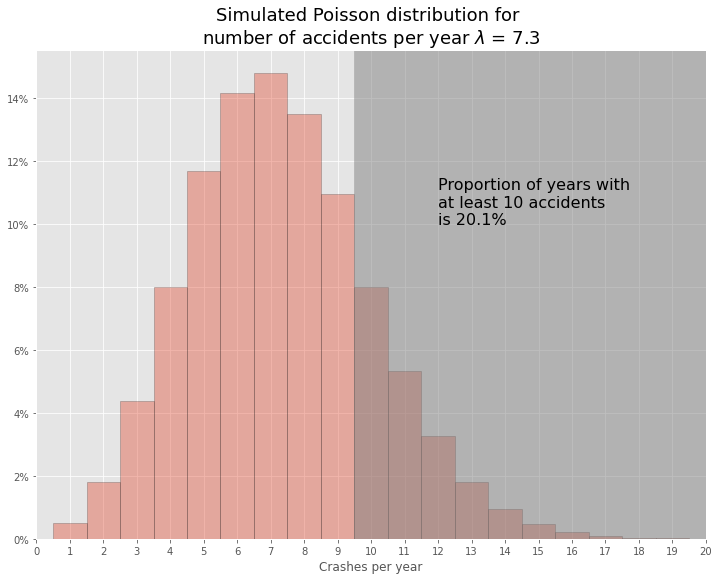

In [33]:
fig, ax = plt.subplots(figsize=(12,9))
sns.distplot(np.random.poisson(365/50,1000000), kde=False, bins = np.arange(0.5,20.5,1), norm_hist=True,
            hist_kws={'edgecolor':'k'}, ax=ax)
ax.axvspan(9.5, 99, ymin=0, ymax=1, alpha=0.5, color='grey')
ax.text(12,0.10,f'Proportion of years with \nat least 10 accidents \nis {prop_10_plus:.1%}', fontsize=16)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))   #percentage
ax.set_title(f'Simulated Poisson distribution for \nnumber of accidents per year $\lambda$ = {365/days_between_crashes}',
fontsize=18)
plt.xticks(range(21))
plt.xlim(0,20)
plt.xlabel('Crashes per year')
plt.show();

# Timeline Visualisations

## Create a daily timeseries

In [34]:
#make observation period between 2013 to end of 2020
daily_crash_count = pd.DataFrame()
date_range = pd.date_range('1-1-2013', '31-12-2020')
daily_crash_count['Bayswater'] = bayswater['Bayswater_Bridge_Dates'].value_counts().reindex(date_range).fillna(0)
daily_crash_count['Montague'] = monty['Monty_Bridge_Dates'].value_counts().reindex(date_range).fillna(0)

#now that all the crashes are in a consistent format we can add in metrics such as 90 day rolling sum
daily_crash_count['Monty_90d'] = daily_crash_count.rolling('90d')['Montague'].sum()
daily_crash_count['Bayswater_90d'] = daily_crash_count.rolling('90d')['Bayswater'].sum()

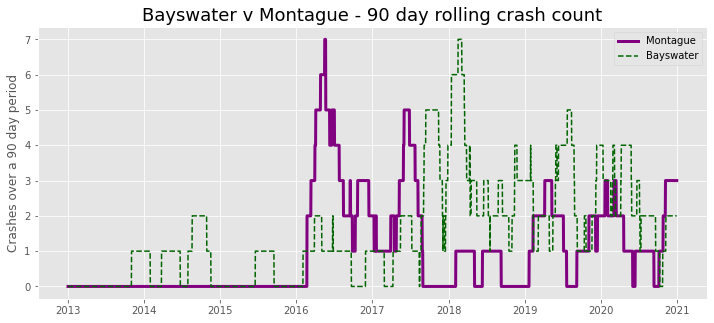

In [35]:
plt.figure(figsize=(12,5))
plt.plot(daily_crash_count['Monty_90d'], color='purple', lw=3, label='Montague')
plt.plot(daily_crash_count['Bayswater_90d'], color='darkgreen', ls='--', label='Bayswater')
plt.legend()
plt.ylabel('Crashes over a 90 day period')
plt.title('Bayswater v Montague - 90 day rolling crash count', fontsize=18);

## Prism Plot

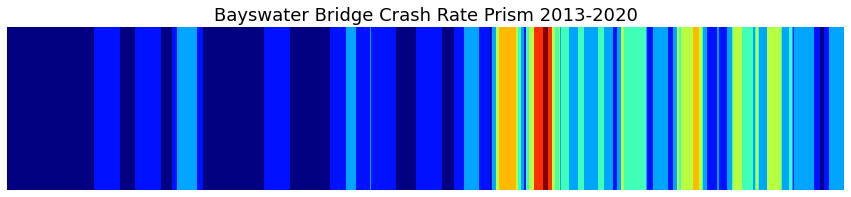

In [36]:
#timeseries prism plot
plt.figure(figsize=(15,3))
sns.heatmap(daily_crash_count[['Bayswater_90d']].T, cmap='jet', cbar=False, vmin=0,vmax=None, 
            xticklabels=False, yticklabels=False)
plt.title('Bayswater Bridge Crash Rate Prism 2013-2020', fontsize=18);

## Dot Plot

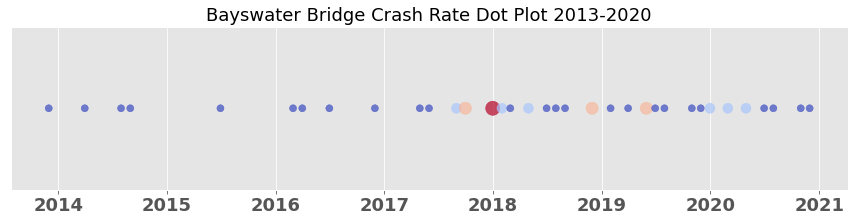

In [37]:
#get the monthly tally
bayswater_monthly = daily_crash_count.resample('M')['Bayswater'].sum()
bayswater_monthly = bayswater_monthly[bayswater_monthly > 0] #filter out months with no strikes

plt.figure(figsize=(15,3))
plt.scatter(bayswater_monthly.index.values,
         np.ones(len(bayswater_monthly)), s = bayswater_monthly.values*50, 
            alpha=0.7, c = bayswater_monthly.values, cmap='coolwarm')
plt.yticks([])
plt.xticks(fontsize=18, fontweight='bold')
plt.title('Bayswater Bridge Crash Rate Dot Plot 2013-2020', fontsize=18);

# We are living in a simulation
## Alternate universe 10 years with 200 bridges

In [38]:
%%time
#create a simulated dataframe 
df_sim = []
num_bridges = 200
max_strikes_per_bridge = 200 #this equates to an average of 18 days between strikes
random.seed(42) #seed to make repeatable
date_range_10y = pd.date_range('1-1-2021', '31-12-2030')


for i in range(num_bridges):
    simulated_days_between_strikes = [round(random.expovariate(1/days_between_crashes)) 
                                     for x in range(max_strikes_per_bridge)]
    cumulative_days = np.cumsum(simulated_days_between_strikes)
    
    cumulative_dt = [date_range_10y[0] + pd.Timedelta(days=cumulative_days[x]) for x in range(len(cumulative_days))
           if date_range_10y[0] + pd.Timedelta(days=cumulative_days[x]) < date_range_10y[-1]]
    
   #bridge strikes in 90 days
    worst_90_days = pd.Series(cumulative_dt, name='series_90d').value_counts().reindex(date_range_10y).fillna(0).rolling('90d').sum().max() 
    
   #worst day bridge strike
    worst_1_day = pd.Series(cumulative_dt, name='series_1d').value_counts().reindex(date_range_10y).fillna(0).max() 

    #total count of bridge strikes over 10 years
    total_strikes = pd.Series(cumulative_dt, name='series_total').value_counts().reindex(date_range_10y).fillna(0).sum()
    
    #longest stretch without a strike over 10 years
    days_no_hits = max(simulated_days_between_strikes)
    
    df_sim.append({'90d':worst_90_days, '1d':worst_1_day, 'total':total_strikes, 'max_days_no_strike':days_no_hits})
    
df_final = pd.DataFrame(df_sim)

Wall time: 3.03 s


## 200 Bridge Statistics

In [39]:
#key statistics
df_final.describe().round()

,90d,1d,total,max_days_no_strike
count,200.0,200.0,200.0,200.0
mean,6.0,1.0,72.0,288.0
std,1.0,1.0,9.0,56.0
min,4.0,1.0,50.0,177.0
25%,5.0,1.0,67.0,250.0
50%,6.0,1.0,72.0,278.0
75%,7.0,2.0,78.0,314.0
max,10.0,2.0,97.0,570.0


Wow! So it is not inconceivable that removing the bridge would save **up to 97 bridge strikes for a 10 year period!**
That is a heartache saved for those hypothetical drivers!

In [40]:
df_final['1d'].value_counts()

1.0    103
2.0     97
Name: 1d, dtype: int64